# Text & HD Vis HW
## Oscar Gomez

In [1]:
import pandas as pd

### Load Data

In [7]:
df = pd.read_csv(filepath_or_buffer='VoxData.csv', header=None,)

print(df.head())

                                                   0
0  A new study by criminologists Sonja Siennick a...
1  President Barack Obama will deliver his final ...
2  The New York Times report that Hillary Clinton...
3  San Diego Comic-Con Saturday belonged to Warne...
4  Police cracked down on violent, racist threats...


### Task 1: Document to Vector

To transform documents into vectors, you should first

- tokenize the documents;
- stemming/lemmatization. You can still use the lemmatization functions we tried in class, but lemmatization may be too time consuming for this data set. You can use stemming instead. Check documents of gensim to learn more about the stemming functions.
- remove stop words

In [ ]:
import gensim, spacy
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk

In [16]:
data = df[0]

data_words = list(map(gensim.utils.simple_preprocess, data))

data_words[0]

['new',
 'study',
 'by',
 'criminologists',
 'sonja',
 'siennick',
 'and',
 'eric',
 'stewart',
 'of',
 'florida',
 'state',
 'university',
 'and',
 'jeremy',
 'staff',
 'of',
 'penn',
 'state',
 'takes',
 'hard',
 'look',
 'at',
 'the',
 'effects',
 'of',
 'incarceration',
 'on',
 'marriage',
 'here',
 'what',
 'we',
 'already',
 'know',
 'from',
 'other',
 'research',
 'what',
 'this',
 'study',
 'says',
 'and',
 'the',
 'questions',
 'that',
 'remain',
 'unanswered',
 'what',
 'we',
 'already',
 'knew',
 'about',
 'incarceration',
 'and',
 'divorce',
 'incarceration',
 'increases',
 'divorce',
 'rates',
 'studies',
 'consistently',
 'show',
 'that',
 'incarceration',
 'during',
 'marriage',
 'is',
 'correlated',
 'with',
 'higher',
 'divorce',
 'rates',
 'when',
 'one',
 'spouse',
 'has',
 'been',
 'incarcerated',
 'before',
 'getting',
 'married',
 'the',
 'couple',
 'isn',
 'any',
 'more',
 'likely',
 'to',
 'split',
 'up',
 'but',
 'when',
 'spouse',
 'is',
 'incarcerated',
 'dur

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['com', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 
                   'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 
                   'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 
                   'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 
                   'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [20]:
data_words = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]

data_words[0]

['new',
 'study',
 'criminologists',
 'sonja',
 'siennick',
 'eric',
 'stewart',
 'florida',
 'state',
 'university',
 'jeremy',
 'staff',
 'penn',
 'state',
 'takes',
 'hard',
 'look',
 'effects',
 'incarceration',
 'marriage',
 'already',
 'research',
 'study',
 'says',
 'questions',
 'remain',
 'unanswered',
 'already',
 'knew',
 'incarceration',
 'divorce',
 'incarceration',
 'increases',
 'divorce',
 'rates',
 'studies',
 'consistently',
 'show',
 'incarceration',
 'marriage',
 'correlated',
 'higher',
 'divorce',
 'rates',
 'one',
 'spouse',
 'incarcerated',
 'getting',
 'married',
 'couple',
 'likely',
 'split',
 'spouse',
 'incarcerated',
 'marriage',
 'odds',
 'divorce',
 'increase',
 'inmate',
 'released',
 'prison',
 'marriage',
 'still',
 'risk',
 'fact',
 'inmates',
 'spouses',
 'optimistic',
 'marriages',
 'inmate',
 'released',
 'optimism',
 'often',
 'falls',
 'apart',
 'one',
 'study',
 'dutch',
 'men',
 'found',
 'odds',
 'divorce',
 'increased',
 'ten',
 'years',
 'i

In [21]:
data_ready = []
# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
for sent in data_words:
    # Parse the sentence using the loaded 'en' model object `nlp`. Extract the lemma for each token and join
    doc = nlp(" ".join(sent)) 
    data_ready.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
# remove stopwords once more after lemmatization
data_ready = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_ready]

In [25]:
print(data_ready[0])

['new', 'study', 'criminologist', 'sonja', 'siennick', 'eric', 'stewart', 'florida', 'state', 'university', 'jeremy', 'staff', 'penn', 'state', 'hard', 'look', 'effect', 'incarceration', 'marriage', 'already', 'research', 'study', 'question', 'remain', 'unanswered', 'already', 'incarceration', 'divorce', 'incarceration', 'increase', 'divorce', 'rate', 'study', 'consistently', 'show', 'incarceration', 'marriage', 'correlate', 'high', 'divorce', 'rate', 'spouse', 'incarcerate', 'married', 'couple', 'likely', 'split', 'spouse', 'incarcerate', 'marriage', 'odd', 'divorce', 'increase', 'inmate', 'release', 'prison', 'marriage', 'still', 'risk', 'fact', 'inmate', 'spouse', 'optimistic', 'marriage', 'inmate', 'release', 'optimism', 'often', 'fall', 'apart', 'study', 'dutch', 'man', 'find', 'odd', 'divorce', 'increase', 'year', 'incarceration', 'longer', 'inmate', 'prison', 'likely', 'marriage', 'fail', 'recent', 'study', 'find', 'year', 'incarceration', 'increase', 'odd', 'inmate', 'marriage'

### Task 2: Topic Modelling

Create 30 topics using LDA. You can make it faster by setting only corpus, id2word, and num_topics, and leaving others the default.

In [26]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [28]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30)

In [46]:
lda_model.print_topics(num_topics=30)

[(0,
  '0.017*"trump" + 0.007*"russia" + 0.006*"policy" + 0.006*"country" + 0.005*"political" + 0.005*"russian" + 0.005*"president" + 0.004*"american" + 0.004*"china" + 0.004*"foreign"'),
 (1,
  '0.012*"people" + 0.008*"vaccine" + 0.007*"black" + 0.006*"pym" + 0.005*"law" + 0.005*"american" + 0.004*"state" + 0.004*"time" + 0.004*"new" + 0.003*"year"'),
 (2,
  '0.015*"iran" + 0.009*"nuclear" + 0.008*"people" + 0.008*"deal" + 0.007*"time" + 0.006*"iranian" + 0.006*"tell" + 0.005*"greece" + 0.005*"german" + 0.005*"year"'),
 (3,
  '0.008*"show" + 0.006*"time" + 0.005*"film" + 0.005*"year" + 0.005*"star" + 0.005*"movie" + 0.004*"first" + 0.004*"man" + 0.004*"much" + 0.004*"find"'),
 (4,
  '0.014*"sander" + 0.007*"new" + 0.006*"party" + 0.005*"people" + 0.005*"year" + 0.005*"time" + 0.004*"win" + 0.004*"democratic" + 0.004*"first" + 0.004*"show"'),
 (5,
  '0.015*"people" + 0.013*"law" + 0.013*"woman" + 0.011*"court" + 0.010*"state" + 0.008*"discrimination" + 0.008*"sexual" + 0.007*"lgbtq" + 

### Task 3: Generate Topic Vectors

Create a topic vector for each document. As required above, you should have created 30 topics. So you should generate a 30-dimensional vector for each document. A value v at the ith dimension of the topic vector(t_v) for a document x (t_v[i]=a), means the document x has a probability of a to be related to the ith topic.

If you use gensim, you can get the topic distribution for the given document by using the function get_document_topics after you generate the LDA model.

In [88]:
distribution = lda_model.get_document_topics(corpus, minimum_probability=0)

In [99]:
distribution[0]

[(0, 8.658009e-05),
 (1, 8.658009e-05),
 (2, 8.658009e-05),
 (3, 8.658009e-05),
 (4, 8.658009e-05),
 (5, 0.18705533),
 (6, 8.658009e-05),
 (7, 8.658009e-05),
 (8, 8.658009e-05),
 (9, 8.658009e-05),
 (10, 8.658009e-05),
 (11, 8.658009e-05),
 (12, 8.658009e-05),
 (13, 8.658009e-05),
 (14, 8.658009e-05),
 (15, 8.658009e-05),
 (16, 8.658009e-05),
 (17, 8.658009e-05),
 (18, 8.658009e-05),
 (19, 8.658009e-05),
 (20, 8.658009e-05),
 (21, 8.658009e-05),
 (22, 8.658009e-05),
 (23, 0.8105204),
 (24, 8.658009e-05),
 (25, 8.658009e-05),
 (26, 8.658009e-05),
 (27, 8.658009e-05),
 (28, 8.658009e-05),
 (29, 8.658009e-05)]

### Task 4: Project Topic Vectors

Run a dimension reduction algorithm to map the topic vectors into 2D space and plot the vectors.

In [94]:
import numpy as np

X = []
for doc in distribution:
    temp = []
    for tup in doc:
        temp.append(tup[1])
    X.append(temp)
        
X = np.array(X)

X.shape

(6904, 30)

In [165]:
from sklearn.decomposition import PCA

X_embedded_pca = PCA(n_components=2).fit_transform(X)
X_embedded_pca.shape

(6904, 2)

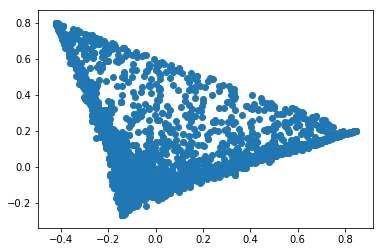

In [166]:
plt.scatter(X_embedded_pca[:,0], X_embedded_pca[:,1])
plt.show()

In [167]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(6904, 2)

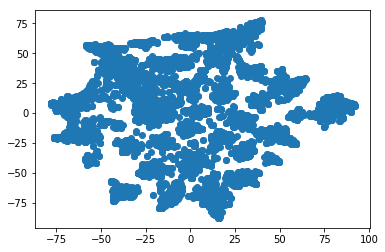

In [168]:
import matplotlib.pyplot as plt

plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

### Task 5: Color the Clusters

Choose a clustering method you like to generate some meaningful clusters. Plot the projection again with the clusters in different colors.

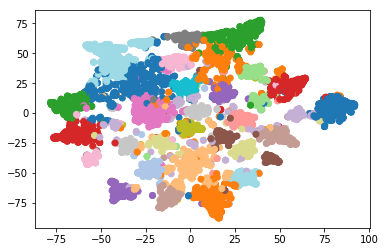

In [170]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30, random_state=0).fit(X)
kmeans.labels_

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=kmeans.labels_, cmap='tab20')
plt.show()

### Task 6: Plot the distribution of topics

Generate a static visualization to answer the question: how many documents are related to each topic?

In [171]:
# Y has the index of the maximum of X in each sample

Y = [np.argmax(XX) for XX in X]

In [172]:
Y = np.array(Y)
Y

array([23, 20, 20, ..., 20, 26, 16], dtype=int64)

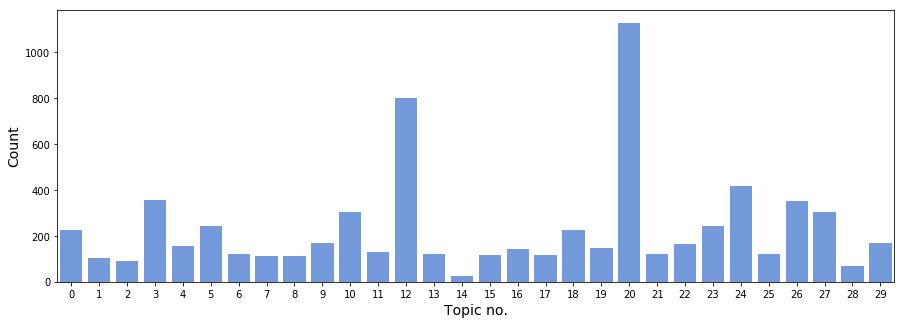

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

df['topic'] = Y

f = plt.figure(figsize=(15,5))
sns.countplot(x="topic", data=df, color="cornflowerblue")
plt.xlabel('Topic no.', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()